(1600, 1200, 3)


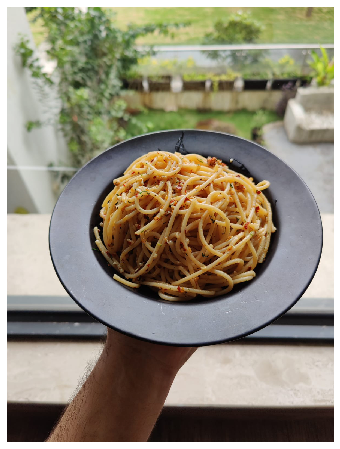

In [27]:
from skimage import img_as_float
import matplotlib.pyplot as plt
import numpy as np
from numpy.linalg import svd
from math import log10, sqrt
plt.axis('off')
file='810m'
plt.rcParams['figure.figsize']=[16,8]
img=img_as_float(plt.imread(r"C:\Users\madhav\Desktop\image dataset\\"+file+".jpeg"))
plt.imshow(img)
print(img.shape)
imageHeight=img.shape[0]
imageWidth=img.shape[1]
q=10

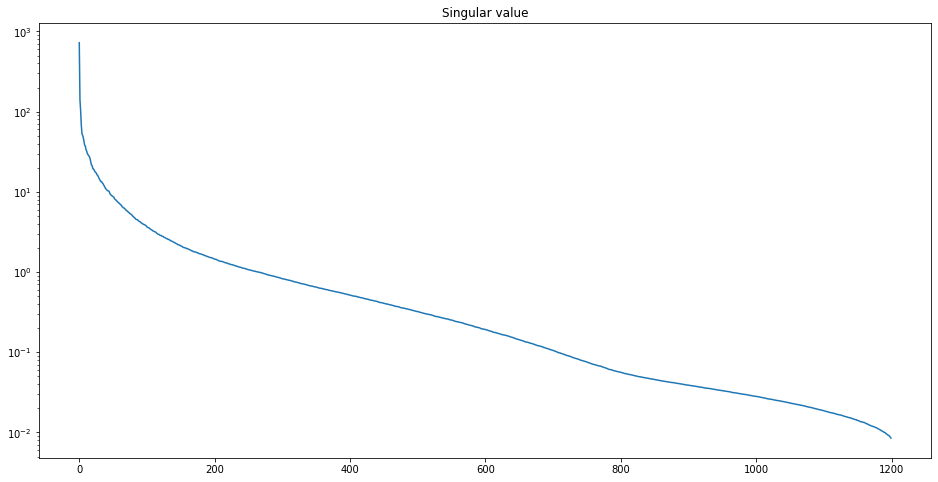

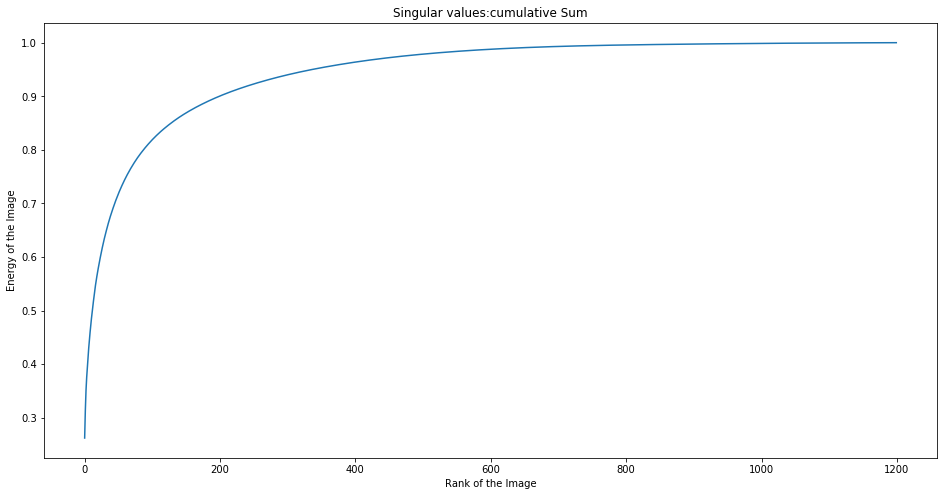

In [28]:
A=img
x=np.mean(A,-1)
U,S,VT=np.linalg.svd(x,full_matrices=False)
S=np.diag(S)
plt.figure(1)
plt.semilogy(np.diag(S))
plt.title('Singular value')
plt.show()
plt.figure(2)
plt.plot(np.cumsum(np.diag(S))/np.sum(np.diag(S)))
plt.title('Singular values:cumulative Sum')
plt.xlabel('Rank of the Image')
plt.ylabel('Energy of the Image')
plt.savefig(r"C:\Users\madhav\Desktop\graph\\"+file+ "g.jpeg")
plt.show()

In [33]:
rank=326
print("rank:",rank)
def compress_svd(image,r):#r- Rank
    U,S,V=svd(image,full_matrices=False)
    reconst_matrix=np.dot(U[:,:r],np.dot(np.diag(S[:r]),(V[:r,:])))
    return reconst_matrix,S

rank: 326


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(1600, 1200, 3)
0.005468236533003578
PSNR value is (93.3738577674405, 0.005468236533003578) dB
original size:
5760000
compressed size:
2739378
Ratio compressed size / original size:
0.47558645833333335
Compressed image size is 47.56% of the original image 
DONE - Compressed the image! Over and out!
Rank: 326


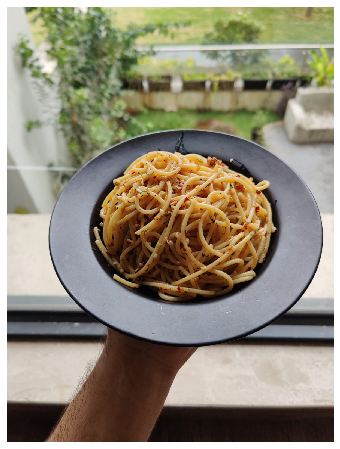

In [34]:
def color_layer(img,r):
    image=img
    original_shape=image.shape
    image_layers=[compress_svd(image[:,:,i],r)[0] for i in range(3)]
    image_reconst=np.zeros(image.shape)
    for i in range(3):
        image_reconst[:,:,i]=image_layers[i]
    plt.axis('off')
    plt.imshow(image_reconst)
    plt.savefig(r"C:\Users\madhav\Desktop\compressed image\\"+file+"c.jpeg",bbox_inches='tight')
    print(image_reconst.shape)
    def PSNR(original, compressed):
        mse = np.mean((original - compressed) ** 2)
        mser= sqrt(mse)
        print(mser)
        if(mse == 0):  # MSE is zero means no noise is present in the signal .
                  # Therefore PSNR have no importance.
            return 100
        max_pixel = 255.0
        psnr = 20 * log10(max_pixel / sqrt(mse))
        return psnr,mser
  
    
    
    original = img
    compressed = image_reconst
    value = PSNR(original, compressed)
    print(f"PSNR value is {value} dB")
    
    
    # CALCULATE AND DISPLAY THE COMPRESSION RATIO
    mr = imageHeight
    mc = imageWidth

    originalSize = mr * mc * 3
    compressedSize = r * (1 + mr + mc) * 3

    print('original size:')
    print(originalSize)

    print('compressed size:')
    print(compressedSize)

    print('Ratio compressed size / original size:')
    ratio = compressedSize * 1.0 / originalSize
    print(ratio)
    c_r=str(round(ratio * 100, 2))

    print('Compressed image size is ' + c_r + '% of the original image ')
    print('DONE - Compressed the image! Over and out!')
    
a=color_layer(img,rank)
print("Rank:",rank)